# Task 6: KNN Classification

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [7]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Features & target
X = df.drop('species', axis=1)
y = df['species']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")

# Best K
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K = {best_k}")


K=1, Accuracy=0.97
K=2, Accuracy=1.00
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00

Best K = 2


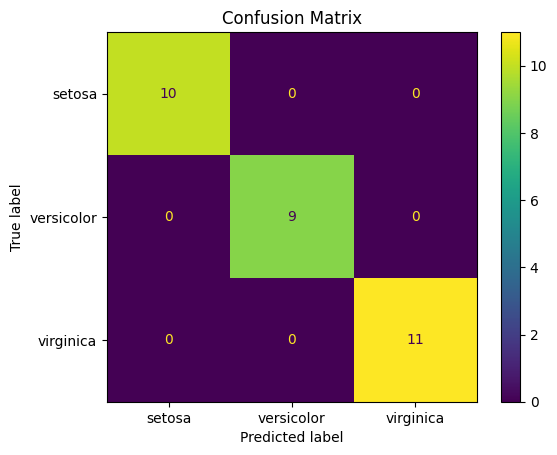

In [9]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

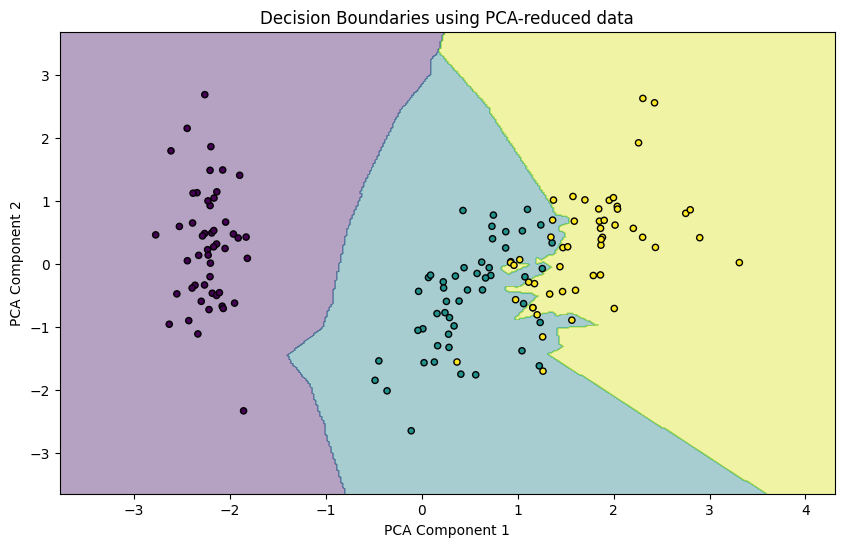

In [ ]:
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)

h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

le = LabelEncoder()
Z_numeric = le.fit_transform(Z)
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pd.factorize(y)[0], edgecolor='k', s=20)
plt.title("Decision Boundaries using PCA-reduced data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
